In [1]:
import pandas as pd
import geopandas as gpd
import folium
import shapely
from datetime import datetime

In [2]:
WGS = 'EPSG:4326'
UTM31N = 'EPSG:32610'

In [ ]:
# Dataset
DS = 'train'

In [ ]:
meteocean_grid_filepath = '../data/stad_metocean_windwaves.parquet'
ais_filepath = f'../data/df_stad_{DS}_west.parquet'
output_filepath = '../data/joined-stad-weather-{DS}.parquet'

# Tiles

In [ ]:
tiles_gdf = gpd.read_parquet(meteocean_grid_filepath)

In [5]:
tiles_gdf['polygon'] = tiles_gdf['polygon_wkt'].apply(shapely.wkt.loads)
tiles_gdf = tiles_gdf.set_geometry(col='polygon')

In [6]:
tiles_gdf = tiles_gdf.reset_index(names='hour') # set current index as column named hour

In [7]:
tiles_gdf = tiles_gdf[['hour', 'x', 'y', 'centroid', 'swh', 'mwd', 'mwp', 'u10', 'v10', 'polygon']]

In [8]:
tiles_gdf = tiles_gdf.set_crs(WGS)

In [9]:
tiles_gdf_utm = tiles_gdf.to_crs(UTM31N)

In [10]:
tiles_gdf_utm

,hour,x,y,centroid,swh,mwd,mwp,u10,v10,polygon
0,2023-01-01 00:00:00,307,786,POINT (242905.472 4263121.163),3.592688,298.626404,9.623456,3.431458,-11.186966,"POLYGON ((234985.342 4255732.28, 250336.701 42..."
1,2023-01-01 01:00:00,307,786,POINT (242905.472 4263121.163),3.630904,300.273438,9.527143,3.677597,-10.866501,"POLYGON ((234985.342 4255732.28, 250336.701 42..."
2,2023-01-01 02:00:00,307,786,POINT (242905.472 4263121.163),3.653697,301.661621,9.459927,4.155945,-11.222565,"POLYGON ((234985.342 4255732.28, 250336.701 42..."
3,2023-01-01 03:00:00,307,786,POINT (242905.472 4263121.163),3.698166,303.540771,9.344286,4.197144,-11.838837,"POLYGON ((234985.342 4255732.28, 250336.701 42..."
4,2023-01-01 04:00:00,307,786,POINT (242905.472 4263121.163),3.760743,305.801270,9.203351,4.035477,-11.851288,"POLYGON ((234985.342 4255732.28, 250336.701 42..."
...,...,...,...,...,...,...,...,...,...,...
5644097,2023-12-30 20:00:00,329,814,POINT (584428.311 3820713.796),4.329062,274.141602,13.071740,4.888596,-5.705536,"POLYGON ((576427.697 3812612.862, 592574.946 3..."
5644098,2023-12-30 21:00:00,329,814,POINT (584428.311 3820713.796),4.266462,274.347412,12.997963,4.493835,-5.378479,"POLYGON ((576427.697 3812612.862, 592574.946 3..."
5644099,2023-12-30 22:00:00,329,814,POINT (584428.311 3820713.796),4.197222,274.477051,12.941591,3.638519,-4.597916,"POLYGON ((576427.697 3812612.862, 592574.946 3..."
5644100,2023-12-30 23:00:00,329,814,POINT (584428.311 3820713.796),4.127405,274.628662,12.881599,4.019196,-4.080353,"POLYGON ((576427.697 3812612.862, 592574.946 3..."


# AIS-based Trajectories

In [11]:
trajs_df = pd.read_parquet(ais_filepath)
geometry = gpd.points_from_xy(trajs_df['longitude'], trajs_df['latitude'])
trajs_gdf = gpd.GeoDataFrame(trajs_df, geometry=geometry, crs=WGS)

In [12]:
trajs_gdf['hour'] = trajs_gdf['timestamp'].apply(datetime.fromtimestamp).dt.floor('h')

In [13]:
trajs_gdf_utm = trajs_gdf.to_crs(UTM31N)

In [14]:
trajs_gdf_utm

,latitude,longitude,SOG,COG,timestamp,MMSI,traj_id,geometry,hour
0,36.151480,-122.550980,12.600000,330.400000,1672531202,416497000,4164970001,POINT (540391.696 4000843.382),2023-01-01 01:00:00
1,36.180222,-122.573689,12.200000,327.474286,1672531802,416497000,4164970001,POINT (538334.856 4004022.168),2023-01-01 01:00:00
2,36.208445,-122.596052,12.265217,328.300000,1672532402,416497000,4164970001,POINT (536310.941 4007144.044),2023-01-01 01:00:00
3,36.236860,-122.619197,12.405714,326.837143,1672533002,416497000,4164970001,POINT (534218.009 4010287.396),2023-01-01 01:00:00
4,36.264735,-122.644051,12.322857,322.640000,1672533602,416497000,4164970001,POINT (531973.323 4013370.881),2023-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...
538218,34.574047,-122.249006,14.800000,97.917742,1690841947,636017537,6360175374538,POINT (568883.397 3826064.371),2023-08-01 00:00:00
538219,34.567788,-122.199009,14.709091,99.690909,1690842547,636017537,6360175374538,POINT (573474.853 3825405.535),2023-08-01 00:00:00
538220,34.561342,-122.150107,14.700000,98.455385,1690843147,636017537,6360175374538,POINT (577966.777 3824727.356),2023-08-01 00:00:00
538221,34.555787,-122.102100,14.700000,98.428571,1690843747,636017537,6360175374538,POINT (582376.399 3824149.488),2023-08-01 00:00:00


# Visualize

In [15]:
weather_grid = tiles_gdf.drop_duplicates(subset=['x', 'y'])
weather_grid = weather_grid[['x', 'y', 'centroid', 'polygon']]
weather_grid

,x,y,centroid,polygon
0,307,786,POINT (242905.472 4263121.163),"POLYGON ((-126.03516 38.41056, -125.85938 38.4..."
8737,307,787,POINT (242416.446 4247833.073),"POLYGON ((-126.03516 38.27269, -125.85938 38.2..."
17474,307,788,POINT (241927.985 4232516.124),"POLYGON ((-126.03516 38.13456, -125.85938 38.1..."
26211,307,789,POINT (241440.102 4217170.352),"POLYGON ((-126.03516 37.99616, -125.85938 37.9..."
34948,307,790,POINT (240952.809 4201795.791),"POLYGON ((-126.03516 37.85751, -125.85938 37.8..."
...,...,...,...,...
5600417,329,810,POINT (583841.455 3884732.042),"POLYGON ((-122.16797 35.03, -121.99219 35.03, ..."
5609154,329,811,POINT (583988.584 3868769),"POLYGON ((-122.16797 34.88593, -121.99219 34.8..."
5617891,329,812,POINT (584135.439 3852778.243),"POLYGON ((-122.16797 34.74161, -121.99219 34.7..."
5626628,329,813,POINT (584282.016 3836759.823),"POLYGON ((-122.16797 34.59704, -121.99219 34.5..."


In [16]:
lonmin, latmin, lonmax, latmax = weather_grid.total_bounds

<class 'shapely.geometry.linestring.LineString'>


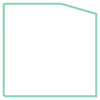

In [17]:
trajs_boundary_line = trajs_gdf.sample(frac=0.5).union_all().convex_hull.boundary
print(type(trajs_boundary_line))
trajs_boundary_line

In [18]:
m = folium.Map([(latmin+latmax)/2, (lonmin+lonmax)/2], zoom_start=7)


for geo in weather_grid.geometry:
    folium.GeoJson(geo, style_function=lambda feature: {
        'color': 'green', 'weight': 2, 'dashArray': '5, 5',
    }).add_to(m)

folium.GeoJson(
    trajs_boundary_line, style_function=lambda feature: {
        'color': 'red', 'weight': 2, 'dashArray': '5, 5',
    }
).add_to(m)

m

# Join

In [ ]:
trajs_weather_gdf_utm = trajs_gdf_utm.sjoin(tiles_gdf_utm,
                                            how='left',
                                            predicate='within',
                                            on_attribute='hour')

In [ ]:
trajs_weather_gdf_utm.isna().sum()

In [ ]:
assert trajs_weather_gdf_utm.shape[0] == trajs_gdf_utm.shape[0]

# Save Results

In [ ]:
trajs_weather_gdf = trajs_weather_gdf_utm.to_crs(WGS)

In [ ]:
trajs_weather_gdf_final = trajs_weather_gdf[
  ['latitude', 'longitude', 'SOG', 'COG', 'timestamp', 'MMSI', 'traj_id', 'swh', 'mwd', 'mwp', 'u10', 'v10']
  ]

In [ ]:
trajs_weather_gdf_final

In [ ]:
trajs_weather_gdf_final.describe()

In [ ]:
trajs_weather_gdf_final.to_parquet(output_filepath)